## Classes

Notebook created: 2018-03-20 23:51:38  
Generated from: _build_py/py/python_oop.rst  

We've seen that in Python there are lots of native types that we can build and use

They hold data and have methods that act on that data:

In [1]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

Now we want to build our own

Let's say we want a consumer type that can earn and spend money

### Example 1

In [3]:
class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

Now let's instantiate a consumer:

In [5]:
cns = Consumer(10)  

In [6]:
cns.wealth

10

In [7]:
cns.spend(4)

In [8]:
cns.wealth

6

In [9]:
cns.earn(15)

In [10]:
cns.wealth

21

In [11]:
cns.spend(100)

Insufficent funds


We can make multiple instances with their own *instance data*

In [12]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [13]:
c1.wealth

10

Instance data is stored as a dict

In [16]:
c1.__dict__

{'wealth': 10}

In [17]:
c2.__dict__

{'wealth': 8}

### Example 2

In [4]:
import numpy as np

class Solow:
    r"""
    Implements the Solow growth model with update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    
    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def update(self):
        "Update the current state (i.e., the capital stock)."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        self.k = (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))
     
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

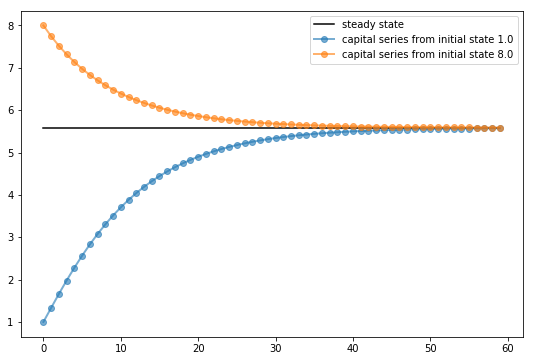

In [5]:
import matplotlib.pyplot as plt

s1 = Solow()  
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend()
plt.show()

### Exercise

Add a method to the class called `plot_time_series` that takes as its arguments

* an `ax` object (of type `matplotlib.axes._subplots.AxesSubplot`)
* an initial condition
* a `series_length` parameter

and adds to the `ax` object a time series plot of length `series_length`

In [6]:
for i in range(40):
    print("solution below")

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


In [7]:
import numpy as np

class Solow:
    r"""
    Implements the Solow growth model with update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    
    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()
        
    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))
     
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path
    
    def plot_time_series(self, ax, k0=4.0, series_length=50):
        self.k = k0
        path = self.generate_sequence(series_length)
        ax.plot(path, '-o')

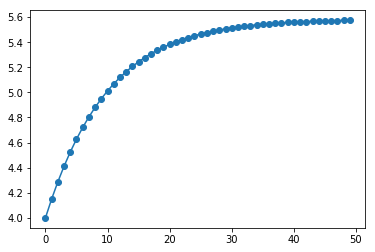

In [8]:
sol = Solow()

fig, ax = plt.subplots()
sol.plot_time_series(ax)

plt.show()